In [1]:
import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

DATA_DIR=Path("../data")
nm2mol = 1E9

In [2]:
df = pd.read_csv("C:/Users/rbachorz/Projects/qsarmodeler/qsarmodeler/notebooks/ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50.csv")
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,717,nM,IC50,325861,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_0000190, Entry 7: BAO_0000190, Entry 8: BAO_0000190, Entry 9: BAO_0000190, Entry 10: BAO_0000190, Entry 11: BAO_0000190, Entry 12: BAO_0000190, Entry 1...",mix,"Entry 0: 36100, Entry 1: 36107, Entry 2: 36115, Entry 3: 36117, Entry 4: 36124, Entry 5: 305503, Entry 6: 312479, Entry 7: 312709, Entry 8: 312710, Entry 9: 312787, Entry 10: 312999, Entry 11: 317578, Entry 12: 327103, Entry 13: 312372, Entry 14: 432232, Entry 15: 432234, Entry 16: 438255, Entry...","Entry 0: Antagonistic activity (IC50) against human androgen receptor (hAR) in co-transfected CV-1 cell, Entry 1: Antagonistic activity against human androgen receptor (hAR) in co-transfected CV-1 cells., Entry 2: In vitro agonistic activity against human androgen receptor (hAR) expressed in CV-...","Entry 0: F, Entry 1: F, Entry 2: F, Entry 3: B, Entry 4: F, Entry 5: B, Entry 6: F, Entry 7: F, Entry 8: F, Entry 9: F, Entry 10: F, Entry 11: B, Entry 12: F, Entry 13: F, Entry 14: B, Entry 15: F, Entry 16: F, Entry 17: B, Entry 18: F, Entry 19: F, Entry 20: F, Entry 21: B, Entry 22: F, Entry 2...",NaN,"Entry 0: CHEMBL884023, Entry 1: CHEMBL648072, Entry 2: CHEMBL648080, Entry 3: CHEMBL648082, Entry 4: CHEMBL649556, Entry 5: CHEMBL831105, Entry 6: CHEMBL833228, Entry 7: CHEMBL837992, Entry 8: CHEMBL837993, Entry 9: CHEMBL833436, Entry 10: CHEMBL873340, Entry 11: CHEMBL877304, Entry 12: CHEMBL86...","Entry 0: 10.1016/s0960-894x(98)00107-3, Entry 1: 10.1021/jm970699s, Entry 2: 10.1016/s0960-894x(99)00118-3, Entry 3: 10.1016/s0960-894x(99)00118-3, Entry 4: 10.1016/s0960-894x(00)00010-x, Entry 5: 10.1016/j.bmcl.2004.10.085, Entry 6: 10.1016/j.bmcl.2004.09.049, Entry 7: 10.1016/j.bmcl.2004.10.05...","Entry 0: 9871534, Entry 1: 948451

In [3]:
df["coms_canonical_smiles"]

0                                                      CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21
1                                 CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(C(F)(F)F)c1
2                                                      CCC1CCc2cc3c(C(F)(F)F)cc(=O)oc3cc2N1
3                                                    CC1(C)CCc2cc3c(C(F)(F)F)cc(=O)oc3cc2N1
4                                                        O=c1cc(C(F)(F)F)c2cc3c(cc2o1)NCCC3
                                               ...                                         
2326    COc1cncc(C2=CC[C@H]3[C@@H]4CC=C5C[C@@H](NC(=O)c6ccnnc6)CC[C@]5(C)[C@H]4CC[C@]23C)c1
2327                              CC(O)c1cc(C(=O)NCc2ccn(-c3ccc(C#N)c(C(F)(F)F)c3)n2)n[nH]1
2328                           O=C(Cc1ccn(-c2ccc([N+](=O)[O-])c(C(F)(F)F)c2)n1)Nc1ccc(F)cn1
2329                                                CC(c1ccccc1)N(C)c1ccc(C#N)c(C(F)(F)F)n1
2330                                        C[C@](O)(CCOc1ccc(F)cc1)C(=O)N1CCc2c

In [4]:
max_act = 55
act_cols = ["act_"+str(item) for item in range(max_act)]
df["act_std"] = df[act_cols].apply(lambda x: np.std(x), axis=1)
df["act_min"] = df[act_cols].apply(lambda x: np.min(x), axis=1)
df = df[df["act_min"] > 0]
df["act_mean"] = df[act_cols].apply(lambda x: np.mean(x), axis=1)
df = df[df["act_mean"] > 0]
df["act_median"] = df[act_cols].apply(lambda x: np.nanmedian(x), axis=1)
df["act_max"] = df[act_cols].apply(lambda x: np.max(x), axis=1)
df["log_act_mean"] = df[act_cols].apply(lambda x: np.log10(np.mean(x)), axis=1)
df["log_act_median"] = df[act_cols].apply(lambda x: np.log10(np.nanmedian(x)), axis=1)
df["log_act_min"] = df[act_cols].apply(lambda x: np.log10(np.min(x)), axis=1)
df["pIC50_mean"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.mean(x) / nm2mol), axis=1)
df["pIC50_median"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.nanmedian(x) / nm2mol), axis=1)
df["pIC50_min"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.min(x) / nm2mol), axis=1)
df["meas_count"] = df[act_cols].apply(lambda x: max_act-np.sum(np.isnan(x)), axis=1)
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,1.0,5.500,5.5,10.0,0.740363,0.740363,0.0,8.259637,8.259637,9.0,2
1,717,nM,IC50,325861,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_0000190, Entry 7: BAO_0000190, Entry 8: BAO_0000190, Entry 9: BAO_0000190, Entry 10: BAO_0000190, Entry 11: BAO_0000190, Entry 12: BAO_0000190, Entry 1...",mix,"Entry 0: 36100, Entry 1: 36107, Entry 2: 36115, Entry 3: 36117, Entry 4: 36124, Entry 5: 305503, Entry 6: 312479, Entry 7: 312709, Entry 8: 312710, Entry 9: 312787, Entry 10: 312999, Entry 11: 317578, Entry 12: 327103, Entry 13: 312372, Entry 14: 432232, Entry 15: 432234, Entry 16: 438255, Entry...","Entry 0: Antagonistic activity (IC50) against human androgen receptor (hAR) in co-transfected CV-1 cell, Entry 1: Antagonistic activity against human androgen receptor (hAR) in co-transfected CV-1 cells., Entry 2: In vitro agonistic activity against human androgen receptor (hAR) expressed in CV-...","Entry 0: F, Entry 1: F, Entry 2: F, Entry 3: B, Entry 4: F, Entry 5: B, Entry 6: F, Entry 7: F, Entry 8: F, Entry 9: F, Entry 10: F, Entry 11: B, Entry 12: F, Entry 13: F, Entry 14: B, Entry 15: F, Entry 16: F, Entry 17: B, Entry 18: F, Entry 19: F, Entry 20: F, Entry 21: B, Entry 22: F, Entry 2...",NaN,"Entry 0: CHEMBL884023, Entry 1: CHEMBL648072, Entry 2: CHEMBL648080, Entry 3: CHEMBL648082, Entry 4: CHEMBL649556, Entry 5: CHEMBL831105, Entry 6: CHEMBL833228, Entry 7: CHEMBL837992, Entry 8: CHEMBL837993, Entry 9: CHEMBL833436, Entry 10: CHEMBL873340, Entry 11: CHEMBL877304, Entry 12: CHEMBL86...","Entry 0: 10.1016/s0960-894x(98)00107-3, Entry 1: 10.1021/jm970699s, Entry 2: 10.1016/s0960-894x(99)00118-3, Entry 3: 10.1016/s0960-8

<Axes: >

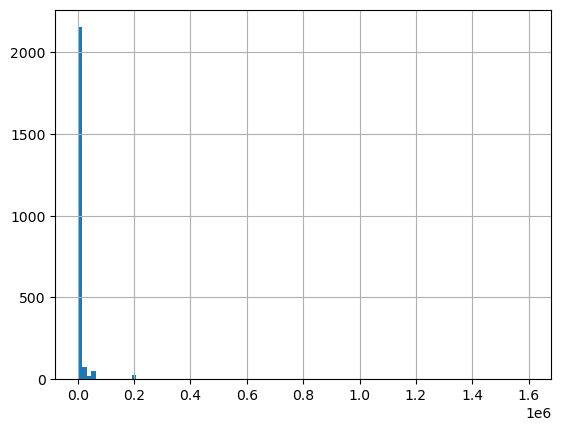

In [5]:
df["act_mean"].hist(bins=100)

Text(0.5, 1.0, 'Conflicting IC50 values')

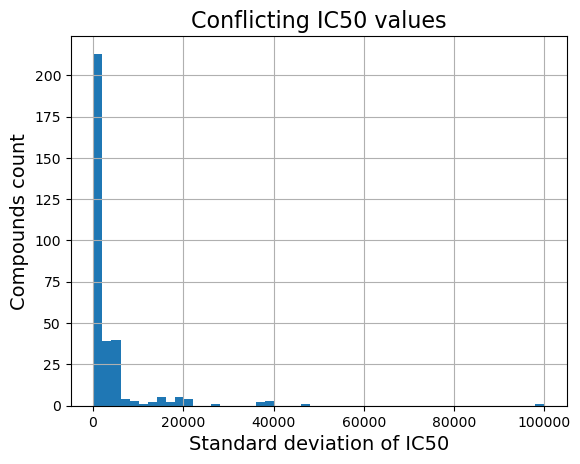

In [6]:
data = df[df["act_std"] > 100]["act_std"]
plt.hist(data, bins=50)
plt.grid()
plt.xlabel("Standard deviation of IC50", fontsize=14)
plt.ylabel("Compounds count", fontsize=14)
plt.title("Conflicting IC50 values", fontsize=16)
# plt.savefig("C:\\Users\\rbachorz\\Projects\\rorgammaaidd\\presentation\\IC50_std_distribution.svg", dpi=200)

In [7]:
df.shape[0]/data.shape[0]

7.144171779141105

In [8]:
# def median_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.nanmedian(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.nanmedian(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError
    
# def mean_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.mean(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.mean(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError

# def min_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.min(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.min(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError 

In [9]:
# df["act_mean_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(mean_incorporate_expert, axis=1)
# df["act_median_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(median_incorporate_expert, axis=1)
# df["act_min_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(min_incorporate_expert, axis=1)

# df["pIC50_mean_expert"] = df["act_mean_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_median_expert"] = df["act_median_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_min_expert"] = df["act_min_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))

In [10]:
activity_thresholds = [1000, 2000, 3000, 4000, 5000]
for at in activity_thresholds:
    df["class_activity_mean_"+str(at)] = df["act_mean"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_mean_expert_"+str(at)] = df["act_mean_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_median_"+str(at)] = df["act_median"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_median_expert_"+str(at)] = df["act_median_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_min_"+str(at)] = df["act_min"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_max_"+str(at)] = df["act_max"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

In [11]:
df

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,1.0,5.500,5.5,10.0,0.740363,0.740363,0.000000,8.259637,8.259637,9.000000,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
1,717,nM,IC50,325861,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_0000190, Entry 7: BAO_0000190, Entry 8: BAO_0000190, Entry 9: BAO_0000190, Entry 10: BAO_0000190, Entry 11: BAO_0000190, Entry 12: BAO_0000190, Entry 1...",mix,"Entry 0: 36100, Entry 1: 36107, Entry 2: 36115, Entry 3: 36117, Entry 4: 36124, Entry 5: 305503, Entry 6: 312479, Entry 7: 312709, Entry 8: 312710, Entry 9: 312787, Entry 10: 312999, Entry 11: 317578, Entry 12: 327103, Entry 13: 312372, Entry 14: 432232, Entry 15: 432234, Entry 16: 438255, Entry...","Entry 0: Antagonistic activity (IC50) against human androgen receptor (hAR) in co-transfected CV-1 cell, Entry 1: Antagonistic activity against human androgen receptor (hAR) in co-transfected CV-1 cells., Entry 2: In vitro agonistic activity against human androgen receptor (hAR) expressed in CV-...","Entry 0: F, Entry 1: F, Entry 2: F, Entry 3: B, Entry 4: F, Entry 5: B, Entry 6: F, Entry 

In [12]:
df.columns

Index(['comp_molregno', 'act_standard_units', 'act_standard_type',
       'act_activity_comment', 'act_bao_endpoint', 'act_type', 'ass_assay_id',
       'ass_description', 'ass_assay_type', 'ass_assay_category',
       ...
       'class_activity_min_3000', 'class_activity_max_3000',
       'class_activity_mean_4000', 'class_activity_median_4000',
       'class_activity_min_4000', 'class_activity_max_4000',
       'class_activity_mean_5000', 'class_activity_median_5000',
       'class_activity_min_5000', 'class_activity_max_5000'],
      dtype='object', length=108)

In [13]:
df[(df["doc_doc_type"]=="DATASET") & (df["ass_chembl_id"]=="CHEMBL2114928")]#["ass_chembl_id"].unique()

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000


In [14]:
df.head(1)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,1.0,5.5,5.5,10.0,0.740363,0.740363,0.0,8.259637,8.259637,9.0,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE


<Axes: >

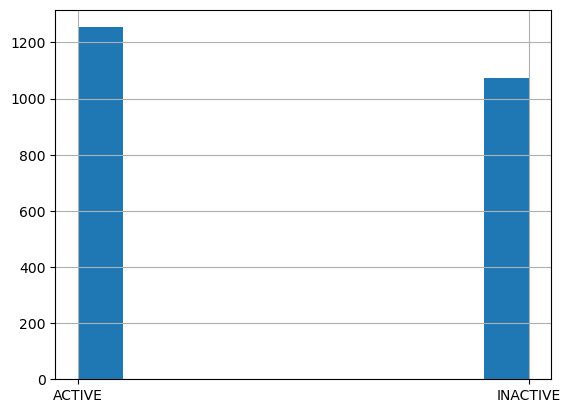

In [15]:
df["class_activity_median_1000"].hist()

In [16]:
df.to_csv(DATA_DIR/"processed"/"ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50.csv_processed.csv", sep=",", index=False)

In [17]:
DATA_DIR

WindowsPath('../data')